Using cache found in /home/ujjwal/.cache/torch/hub/pytorch_vision_v0.10.0


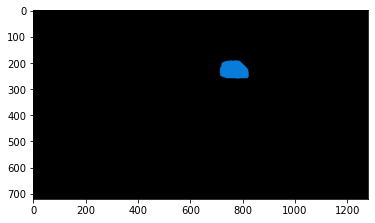

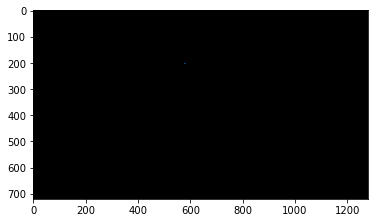

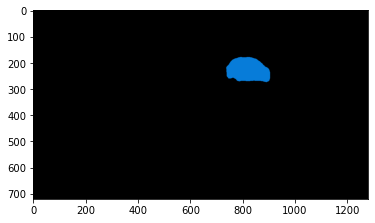

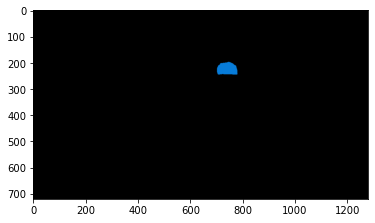

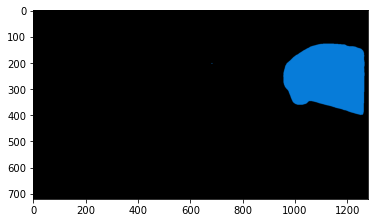

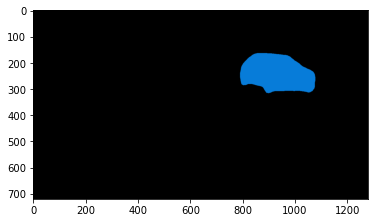

In [1]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the DeepLab model (choose the appropriate variant)
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()

# Define the path to your aircraft images folder
folder_path = 'images'

# Define mean and std for RGB channels
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Create a normalization transform
preprocess = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize using specified mean and std
])

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load and preprocess the image
        input_image = Image.open(os.path.join(folder_path, filename))
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

        # Move the input and model to GPU for speed if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        # Perform inference and get segmentation predictions
        with torch.no_grad():
            output = model(input_batch)['out'][0]
        output_predictions = output.argmax(0)

        # Create a color palette for visualization
        palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
        colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
        colors = (colors % 255).numpy().astype("uint8")

        # Plot the semantic segmentation predictions with colors representing classes
        r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
        r.putpalette(colors)

        plt.imshow(r)
        plt.show()


Using cache found in /home/ujjwal/.cache/torch/hub/pytorch_vision_v0.10.0
/home/ujjwal/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


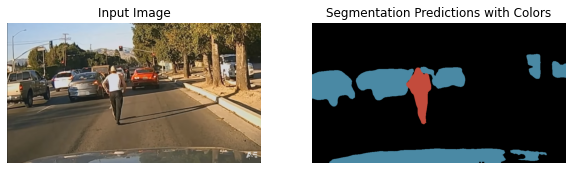

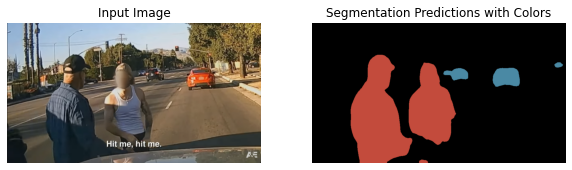

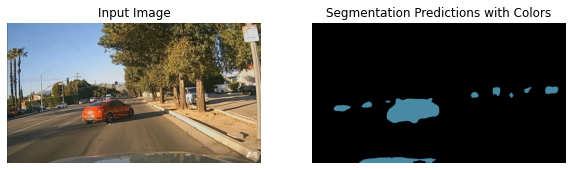

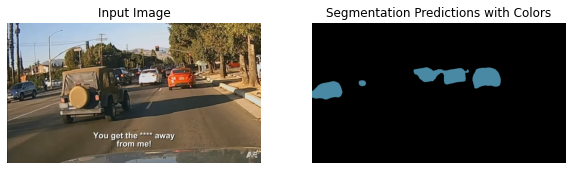

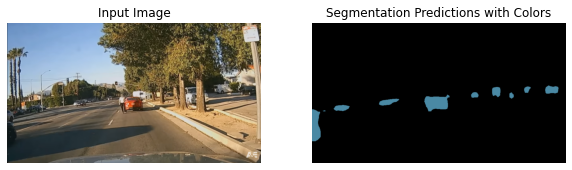

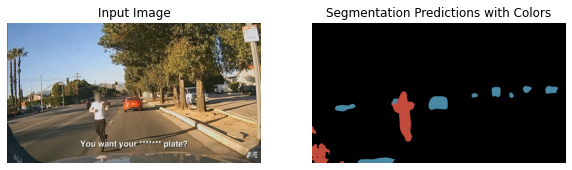

In [4]:
import os
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the DeepLab model (choose the appropriate variant)
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

folder_path = 'crash_2'
output_folder = 'output_resnet50'  # Folder to save output segmentation masks

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the transformation for preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define the color palette for visualization
palette = torch.tensor([3 ** 25 - 1, 3 ** 15 - 1, 3 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load and preprocess the image
        input_image = Image.open(os.path.join(folder_path, filename)).convert("RGB")
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

        # Move the input and model to GPU for speed if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        # Perform inference and get segmentation predictions
        with torch.no_grad():
            output = model(input_batch)['out'][0]
        output_predictions = output.argmax(0)

        # Convert the output predictions to a NumPy array
        output_predictions_np = output_predictions.byte().cpu().numpy()

        # Apply the color palette to the segmentation mask
        output_mask = Image.fromarray(output_predictions_np)
        output_mask.putpalette(colors)

        # Save the semantic segmentation with colors in the output folder
        output_mask.save(os.path.join(output_folder, filename.split('.')[0] + '_segmentation.png'))

        # Plot the input image and semantic segmentation predictions with colors
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(input_image)
        axs[0].axis('off')
        axs[0].set_title('Input Image')

        axs[1].imshow(output_mask)
        axs[1].axis('off')
        axs[1].set_title('Segmentation Predictions with Colors')

        plt.show()

Using resnet50 as a backbone

Using cache found in /home/ujjwal/.cache/torch/hub/pytorch_vision_v0.10.0


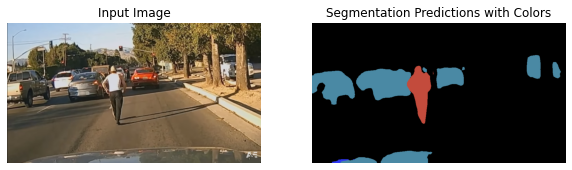

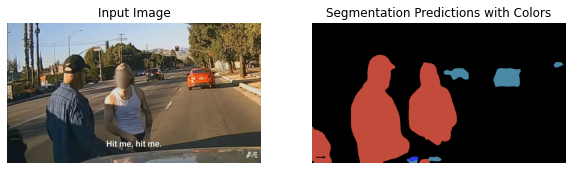

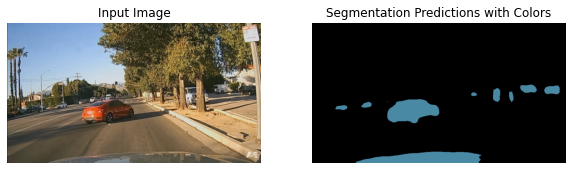

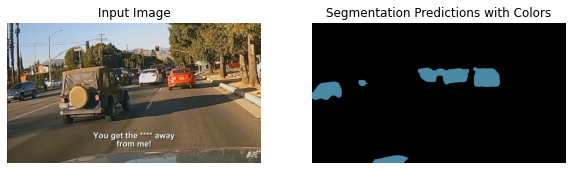

In [ ]:
import os
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the DeepLab model (choose the appropriate variant)
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()

folder_path = 'crash_2'
output_folder = 'output_resnet101'  # Folder to save output segmentation masks

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the transformation for preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define the color palette for visualization
palette = torch.tensor([3 ** 25 - 1, 3 ** 15 - 1, 3 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load and preprocess the image
        input_image = Image.open(os.path.join(folder_path, filename)).convert("RGB")
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

        # Move the input and model to GPU for speed if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        # Perform inference and get segmentation predictions
        with torch.no_grad():
            output = model(input_batch)['out'][0]
        output_predictions = output.argmax(0)

        # Convert the output predictions to a NumPy array
        output_predictions_np = output_predictions.byte().cpu().numpy()

        # Apply the color palette to the segmentation mask
        output_mask = Image.fromarray(output_predictions_np)
        output_mask.putpalette(colors)

        # Save the semantic segmentation with colors in the output folder
        output_mask.save(os.path.join(output_folder, filename.split('.')[0] + '_segmentation.png'))

        # Plot the input image and semantic segmentation predictions with colors
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(input_image)
        axs[0].axis('off')
        axs[0].set_title('Input Image')

        axs[1].imshow(output_mask)
        axs[1].axis('off')
        axs[1].set_title('Segmentation Predictions with Colors')

        plt.show()

Using resnet101 as a backbone on crash2 images 

Using cache found in /home/ujjwal/.cache/torch/hub/pytorch_vision_v0.10.0
/home/ujjwal/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ujjwal/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_mobilenet_v3_large-fc3c493d.pth" to /home/ujjwal/.cache/torch/hub/checkpoints/deeplabv3_mobilenet_v3_large-fc3c493d.pth
100%|██████████████████████████████████████| 42.3M/42.3

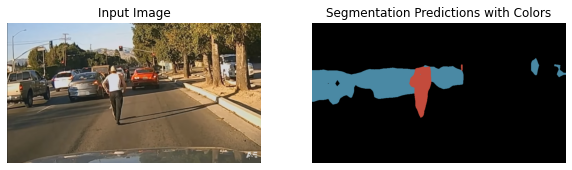

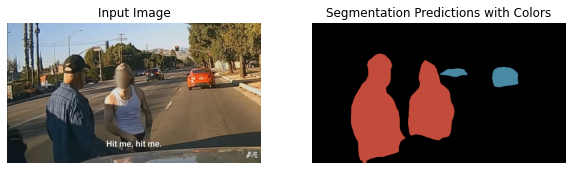

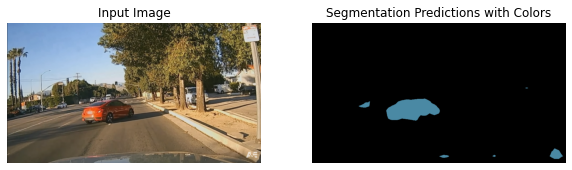

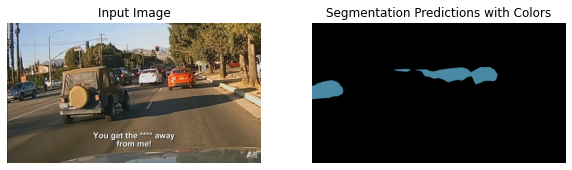

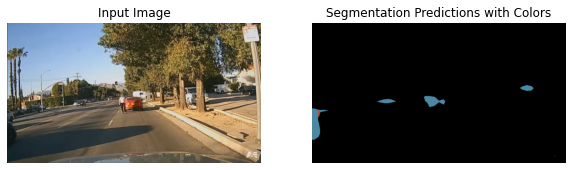

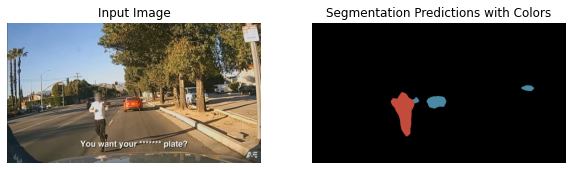

In [1]:
import os
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the DeepLab model (choose the appropriate variant)
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

folder_path = 'crash_2'
output_folder = 'output_predictions'  # Folder to save output segmentation masks

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the transformation for preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define the color palette for visualization
palette = torch.tensor([3 ** 25 - 1, 3 ** 15 - 1, 3 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load and preprocess the image
        input_image = Image.open(os.path.join(folder_path, filename)).convert("RGB")
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

        # Move the input and model to GPU for speed if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        # Perform inference and get segmentation predictions
        with torch.no_grad():
            output = model(input_batch)['out'][0]
        output_predictions = output.argmax(0)

        # Convert the output predictions to a NumPy array
        output_predictions_np = output_predictions.byte().cpu().numpy()

        # Apply the color palette to the segmentation mask
        output_mask = Image.fromarray(output_predictions_np)
        output_mask.putpalette(colors)

        # Save the semantic segmentation with colors in the output folder
        output_mask.save(os.path.join(output_folder, filename.split('.')[0] + '_segmentation.png'))

        # Plot the input image and semantic segmentation predictions with colors
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(input_image)
        axs[0].axis('off')
        axs[0].set_title('Input Image')

        axs[1].imshow(output_mask)
        axs[1].axis('off')
        axs[1].set_title('Segmentation Predictions with Colors')

        plt.show()


using mobilenetv3 as a backbone on crash2 images 